In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_springsummer=pd.read_csv('201506-citibike-tripdata.csv')
df_fallwinter=pd.read_csv('201411-citibike-tripdata.csv')

In [4]:
df_springsummer['age'] = 2015-df_springsummer['birth year'][(df_springsummer['usertype'] == 'Subscriber')]
df_fallwinter['age'] = 2015-df_fallwinter['birth year'][(df_fallwinter['usertype'] == 'Subscriber')]

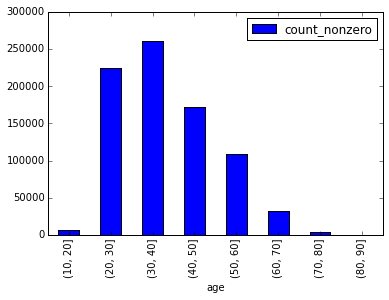

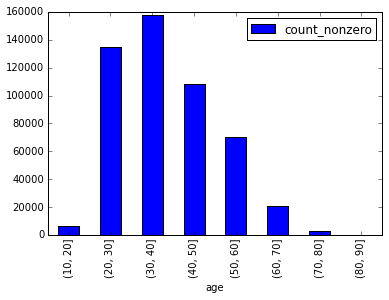

In [10]:
bins = np.arange(10, 99, 10)
df_springsummer.age.groupby(pd.cut(df_springsummer.age, bins)).agg([count_nonzero]).plot(kind='bar')
df_fallwinter.age.groupby(pd.cut(df_fallwinter.age, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
age                    
(10, 20]              0
(20, 30]              0
(30, 40]              0
(40, 50]              0
(50, 60]              0
(60, 70]              0
(70, 80]              0
(80, 90]              0
          count_nonzero
age                    
(10, 20]              0
(20, 30]              0
(30, 40]              0
(40, 50]              0
(50, 60]              0
(60, 70]              0
(70, 80]              0
(80, 90]              0
(0.085657605018426453, 0.0)


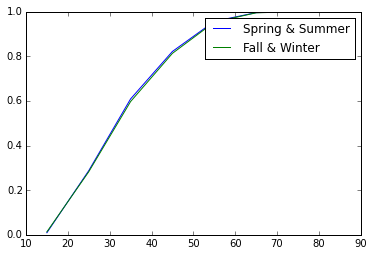

In [16]:
csSS=df_springsummer.age.groupby(pd.cut(df_springsummer.age, bins)).agg([count_nonzero]).cumsum()
csFW=df_fallwinter.age.groupby(pd.cut(df_fallwinter.age, bins)).agg([count_nonzero]).cumsum()


print np.abs(csSS / csSS.max()-csSS / csSS.max())
print np.abs(csFW / csFW.max()-csFW / csFW.max())


pl.plot(bins[:-1] + 5, csSS / csSS.max(), label = "Spring & Summer")
pl.plot(bins[:-1] + 5, csFW / csFW.max(), label = "Fall & Winter")
pl.legend()

ks_SSFW=scipy.stats.ks_2samp(df_springsummer.age, df_fallwinter.age)
print ks_SSFW

In [29]:
import scipy.stats

print "KS test - spring & summer on normal", scipy.stats.kstest(df_springsummer.age,'norm')
print "anderson test - spring & summer on normal", scipy.stats.anderson(df_springsummer.age, dist='norm')
print "KS test - fall & winter on normal", scipy.stats.kstest(df_fallwinter.age,'norm')
print "anderson test - fall & winter on normal", scipy.stats.anderson(df_fallwinter.age, dist='norm')


 KS test - spring & summer on normal (nan, nan)
anderson test - spring & summer on normal (nan, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS test - fall & winter on normal (nan, nan)
anderson test - fall & winter on normal (nan, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
binomial (np=0.25) on spring & summer - KS (0.085657605018426453, 0.0)


In [38]:
dist_b = np.random.binomial(1, 0.2, 2000)
dist_n = np.random.randn(2000)
print "normal on spring & summer - KS", scipy.stats.ks_2samp(dist_n,df_springsummer.age)
print "binomial (np=0.25) on spring & summer - KS", scipy.stats.ks_2samp(dist_b,df_springsummer.age)

normal on spring & summer - KS (1.0, 0.0)
binomial (np=0.25) on spring & summer - KS (1.0, 0.0)
